<a href="https://colab.research.google.com/github/manoharpavuluri/dl-cnn-flowerclassification/blob/main/dl_cnn_flowerclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL # if you want to see image
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# below we will use get_file function which takes following arguemens. flower_photos is the directory where the photos will be stored. cache_dir,
#     is where flower_photos needs to be stored, '.' specifying same directory as where this python file is.
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
# lets see if it has jpg files
list(data_dir.glob('*/*.jpg'))

AttributeError: 'str' object has no attribute 'glob'

In [6]:
# in order to see and play with the files in the directory, we need to import pathlib library
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [7]:
from prettytable import PrettyTable

def get_folder_extension_counts(directory):
    folder_extension_counts = {}

    for root, dirs, files in os.walk(directory):
        folder_name = os.path.basename(root)
        folder_extension_counts[folder_name] = {'extensions': set(), 'counts': {}}

        for file in files:
            _, extension = os.path.splitext(file)
            extension = extension.lower()  # Convert to lowercase for case-insensitive comparison

            # Update the counts and extensions for the current folder
            folder_extension_counts[folder_name]['extensions'].add(extension)
            folder_extension_counts[folder_name]['counts'][extension] = folder_extension_counts[folder_name]['counts'].get(extension, 0) + 1

    return folder_extension_counts

def display_table(folder_extension_counts):
    table = PrettyTable()
    table.field_names = ["Subfolder Name", "Extension", "Count of Files"]

    for folder, data in folder_extension_counts.items():
        for extension, count in data['counts'].items():
            table.add_row([folder, extension, count])

    print(table)

# Example usage:
directory_path = 'datasets/flower_photos'
folder_extension_counts = get_folder_extension_counts(directory_path)

display_table(folder_extension_counts)


+----------------+-----------+----------------+
| Subfolder Name | Extension | Count of Files |
+----------------+-----------+----------------+
| flower_photos  |    .txt   |       1        |
|   sunflowers   |    .jpg   |      699       |
|     roses      |    .jpg   |      641       |
|     tulips     |    .jpg   |      799       |
|   dandelion    |    .jpg   |      898       |
|     daisy      |    .jpg   |      633       |
+----------------+-----------+----------------+


In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [9]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3268459296_a7346c6b2c.jpg'),
 PosixPath('datasets/flower_photos/roses/3407482427_49d5c75291_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5212877807_a3ddf06a7c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/9309388105_12c0b8dd54_m.jpg')]

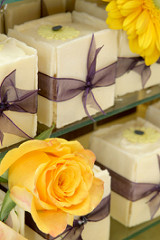

In [10]:
#if you want to see a image, use PIL lib

PIL.Image.open(str(roses[5]))



In [11]:
flower_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'daisy' : list(data_dir.glob('daisy/*'))
}

In [12]:
flower_image_dict['roses']

[PosixPath('datasets/flower_photos/roses/3268459296_a7346c6b2c.jpg'),
 PosixPath('datasets/flower_photos/roses/3407482427_49d5c75291_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5212877807_a3ddf06a7c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6053143173_991c011b23.jpg'),
 PosixPath('datasets/flower_photos/roses/9309388105_12c0b8dd54_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4675532860_890504a4a3_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2325232198_751645d0bb_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1446097778_97149b8362.jpg'),
 PosixPath('datasets/flower_photos/roses/323872063_7264e7e018_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2892056920_918c52889b_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3872230296_6c477309f3_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535495431_e6f950443c.jpg'),
 PosixPath('datasets/flower_photos/roses/16484100863_979beacb08.jpg'),
 PosixPath('datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'),
 P

In [13]:
flower_labels_dict = {
    'roses' : 0,
    'tulips' : 1,
    'sunflowers' : 2,
    'dandelion' : 3,
    'daisy' : 4
}

In [14]:
img = cv2.imread(flower_image_dict['roses'])

TypeError: Can't convert object to 'str' for 'filename'

In [16]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img


array([[[ 73,  42, 203],
        [ 72,  43, 206],
        [ 95,  64, 219],
        ...,
        [ 89,  52, 252],
        [109,  47, 255],
        [120,  68, 245]],

       [[133,  86, 238],
        [115,  76, 232],
        [ 91,  57, 198],
        ...,
        [101,  64, 250],
        [111,  55, 250],
        [115,  65, 251]],

       [[129,  66, 252],
        [131,  77, 254],
        [141,  91, 252],
        ...,
        [ 91,  56, 236],
        [114,  75, 255],
        [ 70,  41, 211]],

       ...,

       [[ 95,  62, 201],
        [105,  67, 221],
        [109,  66, 241],
        ...,
        [ 49,  44,  89],
        [ 46,  39, 100],
        [ 47,  39, 110]],

       [[ 63,  45, 216],
        [ 63,  42, 234],
        [ 53,  28, 246],
        ...,
        [ 43,  36,  73],
        [ 43,  36,  87],
        [ 50,  42, 103]],

       [[ 96,  79, 184],
        [105,  84, 200],
        [111,  87, 219],
        ...,
        [ 39,  34,  66],
        [ 39,  32,  77],
        [ 51,  42,  98]]

In [17]:
img.shape

(375, 500, 3)

In [18]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [20]:
X, y = [], []
for flower_name, images in flower_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flower_image_dict[flower_name])

In [21]:
X = np.array(X)
y = np.array(y)

<ipython-input-21-6c4156275ea8>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(y)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [23]:
len(X_train)

2752

In [24]:
len(X_test)

918

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [26]:
model = Sequential([
    layers.Conv2D(1, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
      layers.Dense(128, activation = 'relu'),
      layers.Dense(5)
])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics =['acuracy']
)

model.fit(X_train_scaled,y_train, epochs = 30)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).